## Edmond Example Data Visualizer

This notebook is intended to provide an illustrative example of a research data visualization methodology that can facilitate understanding of complex information. 
The research data were imported from the Edmond research data repository from the publication
"Grazing enhances carbon cycling but reduces methane emission during peak growing season in the Siberian Pleistocene Park tundra site" (Fischer et al., 2022, https://doi.org/10.5194/bg-19-1611-2022). The dataset relates to this work: https://doi.org/10.17617/3.91. 
As an example, the geographic locations of the various measurements were plotted on a map to explore and gain an understanding of the differences between these locations. In addition, charts were created to illustrate the measurements in the paper.

In [14]:
# Import file from edmond
import requests
import zipfile
import io

# Get all files of the dataset as zipfile
x = requests.get("https://edmond.mpdl.mpg.de/api/access/dataset/:persistentId?persistentId=doi:10.17617/3.91")


# Open the zip file, iterate trough every file
with zipfile.ZipFile(io.BytesIO(x.content)) as zip_file:
    for zip_info in zip_file.infolist():
        # Search for specific file in zipfile
        if zip_info.filename =='daily_avg_EDMONT.csv':
            # Extract the CSV file to the current working directory
            zip_file.extract(zip_info.filename)
            print(f'Saved CSV file: {zip_info.filename}')

print('Zip file downloaded and saved to disk.')

Saved CSV file: daily_avg_EDMONT.csv
Zip file downloaded and saved to disk.


In [15]:
#68°30'43"N 161°30'33.0"E

import folium

basemaps = {
    'Google Maps': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Maps',
        overlay = True,
        control = True
    ),
    'Google Satellite': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Satellite',
        overlay = True,
        control = True
    ),
    'Google Terrain': folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Google',
        name = 'Google Terrain',
        overlay = True,
        control = True
    ),
    'Google Satellite Hybrid': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Satellite',
        overlay = True,
        control = True
    ),
    'Esri Satellite': folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = True,
        control = True
    )
}

# specify the coordinates
lat, lon = 68.3043, 161.30530
latUGR, lonUGR = 68.3700, 161.21000
latStart, lonStart = 68.3373, 161.30530


# create a map centered at the coordinates with satellite tiles
m = folium.Map(location=[latStart, lonStart], zoom_start=11)

popup_text = """Location : Ungrazed Location<br>
                    Coordinates : 68°37'00"N 161°21'00.0"E<br>
                    Explore Location in Google earth : <a href="https://earth.google.com/web/search/68%C2%B037'00%22N+161%C2%B021'00.0%22E/@68.6167913,161.34945608,3.97247887a,355.76344885d,35y,288.00263186h,0t,0r/data=Cl4aNBIuGRBCm3d3J1FAITMzMzMzK2RAKho2OMKwMzcnMDAiTiAxNjHCsDIxJzAwLjAiRRgBIAEiJgokCWZaVZXmIFFAEXvFx_yxIFFAGdHaLh-VMGRAIcZSvhABMGRA" target="_blank">Visit Ungrazed Location</a><br>"""


popup_text2 = """Location : Grazed Location<br>
                    Coordinates : 68°30'43"N 161°30'33.0"E<br>
                    Explore Location in Google earth : <a href="https://earth.google.com/web/search/68%C2%B030'43%22N+161%C2%B030'33.0%22E/@68.5119444,161.5091667,2.01587078a,357.61759495d,35y,0h,45t,0r/data=Cl4aNBIuGbPXcbLDIFFAIcqW9hdLMGRAKho2OMKwMzAnNDMiTiAxNjHCsDMwJzMzLjAiRRgCIAEiJgokCd1neWbZIFFAEf9hHaWXIFFAGQssRsdRMGRAIecvRo-9L2RAKAI" target="_blank">Visit Grazed Location</a><br>
                    More information about the grazing project : <a href="https://pleistocenepark.ru">Pleistocene Park</a><br>
                    """



popup = folium.Popup(popup_text, max_width=500)
popup2 = folium.Popup(popup_text2, max_width=500)

# add a marker at the coordinates
folium.Marker(location=[lat, lon], popup= popup2).add_to(m)
folium.Marker(location=[latUGR, lonUGR], popup= popup).add_to(m)

basemaps['Google Maps'].add_to(m)
basemaps['Esri Satellite'].add_to(m)

# display the map
m



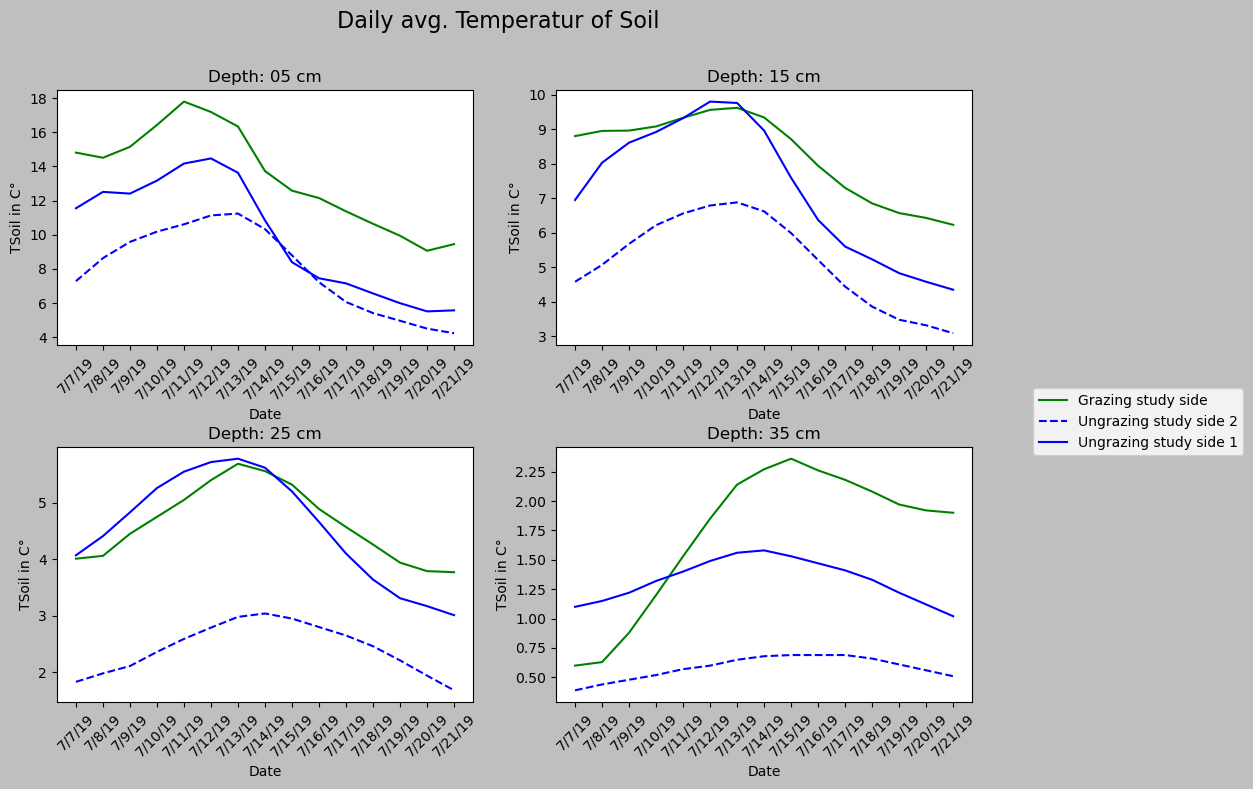

In [16]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style 
# Use grayscale style for the plot
style.use('grayscale')
# Read data
data = pd.read_csv("daily_avg_EDMONT.csv")

# Define soil depth values
soil_depths = ["05", 15, 25, 35]

# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), gridspec_kw={'height_ratios': [20, 20]})

# Iterate over soil depths and plot data for each subplot
for i, depth in enumerate(soil_depths):
    # Select data for current soil depth
    col_name1 = f"TSoil{depth}mean.pp"
    TSoil_ugr_2 = f"TSoil{depth}.amb.2"
    TSoil_ugr_0  = f"TSoil{depth}.amb.0"

    data_depth = data[['Date', col_name1, TSoil_ugr_2, TSoil_ugr_0]]
    data_depth = data_depth.rename(columns={col_name1: 'TSoil_gr', TSoil_ugr_2: 'TSoil_ugr_2' , TSoil_ugr_0: 'TSoil_ugr_0'})
   
    # Create plot for current soil depth
    ax = axs[i//2, i%2]  # select subplot
    ax.plot(data_depth['Date'], data_depth['TSoil_gr'], label="Grazing study side", color="green")
    ax.plot(data_depth['Date'], data_depth['TSoil_ugr_2'],  label="Ungrazing study side 2", color="blue", linestyle='--')
    ax.plot(data_depth['Date'], data_depth['TSoil_ugr_0'],  label="Ungrazing study side 1" , color="blue")

    ax.set_title(f"Depth: {depth} cm")
    ax.set_xlabel('Date')
    ax.set_ylabel('TSoil in C°')
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    
    
     
# Adjust layout and spacing
fig.tight_layout()


plt.legend(loc='center', bbox_to_anchor=(1.4, 1.1), ncol=1)
# Show plot
fig.suptitle(" Daily avg. Temperatur of Soil", fontsize=16)
fig.subplots_adjust(top=0.88)
plt.show()


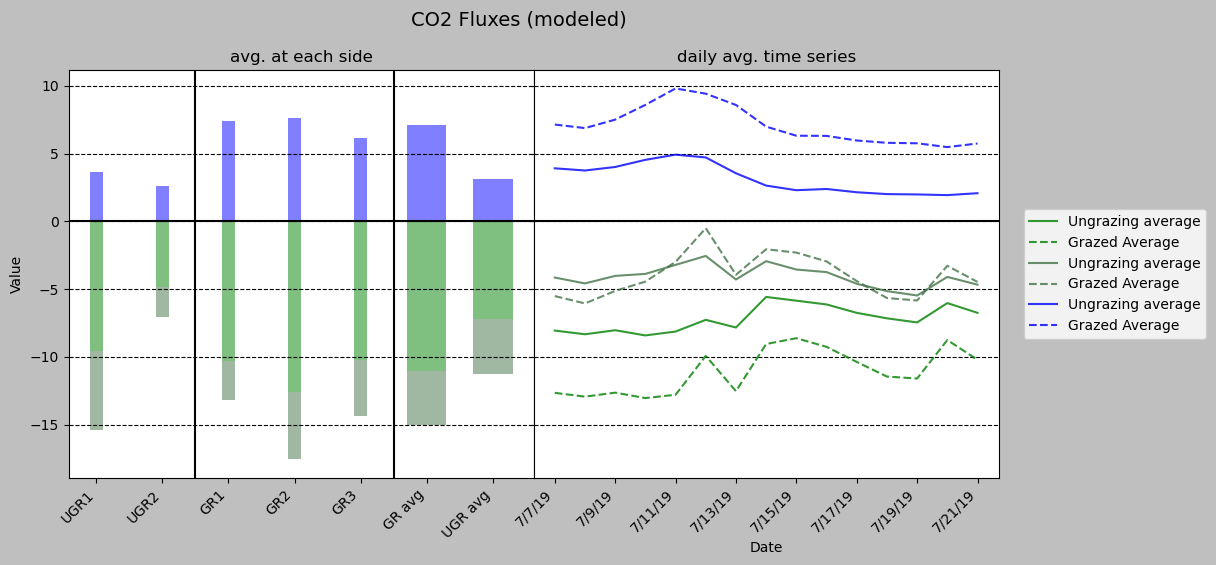

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Load data
data = pd.read_csv("daily_avg_EDMONT.csv")
GPP = [data['GPP.chamber2_0'].mean(), data['GPP.chamber2_2'].mean(), data['GPP.chamber1_1'].mean(),
       data['GPP.chamber1_2'].mean(), data['GPP.chamber1_3'].mean(), data['GPP.pp'].mean(), data['GPP.AS'].mean()]
NEE = [data['NEE.chamber2_0'].mean(), data['NEE.chamber2_2'].mean(), data['NEE.chamber1_1'].mean(),
       data['NEE.chamber1_2'].mean(), data['NEE.chamber1_3'].mean(), data['NEE.pp'].mean(), data['NEE.AS'].mean()]
ECO = [data['ER.chamber2_0'].mean(), data['ER.chamber2_2'].mean(), data['ER.chamber1_1'].mean(),
       data['ER.chamber1_2'].mean(), data['ER.chamber1_3'].mean(), data['ER.pp'].mean(), data['ER.AS'].mean()]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)


x = np.arange(len(GPP))

# the width of the bars
width = [0.2,0.2,0.2,0.2,0.2,0.6, 0.6]

ax1.bar(x, GPP, color='g', label='GPP',  width=width, align='center', alpha=0.5)
ax1.bar(x, NEE, bottom=GPP, color='#437347', label='NEE',  width=width, align='center', alpha=0.5)
ax1.bar(x, ECO, color='b', label='ECO',  width=width, align='center', alpha=0.5)

# add vertical line
ax1.axvline(x=1.5, color='black')
ax1.axvline(x=4.5, color='black')



# Customize the chart
ax1.set_xticks(x)
ax1.set_xticklabels(['UGR1', 'UGR2', 'GR1', 'GR2','GR3','GR avg','UGR avg'])
ax1.set_ylabel('Value')
ax1.set_yticks(np.arange(-15, 12, 5))
ax1.grid(axis='y', linestyle='--')
ax1.grid(axis='x', linestyle='none')
ax1.axhline(y=0.0, color='black', linestyle='-')
ax1.set_title("avg. at each side")



ax2.plot(data['Date'], data['GPP.AS'], label="Ungrazing average", color="g", alpha=0.8)
ax2.plot(data['Date'], data['GPP.pp'], label="Grazed Average", color="g", linestyle='--', alpha=0.8)
ax2.plot(data['Date'], data['NEE.AS'], label="Ungrazing average", color="#437347", alpha=0.8)
ax2.plot(data['Date'], data['NEE.pp'], label="Grazed Average", color="#437347", linestyle='--', alpha=0.8)
ax2.plot(data['Date'], data['ER.AS'], label="Ungrazing average", color="b", alpha=0.8)
ax2.plot(data['Date'], data['ER.pp'], label="Grazed Average", color="b", linestyle='--', alpha=0.8)
ax2.set_xlabel('Date')
ax2.axhline(y=0.0, color='black', linestyle='-')
ax2.grid(axis='y', linestyle='--')
ax2.grid(axis='x', linestyle='none')
ax2.set_title("daily avg. time series")
ax2.legend()

# Format x-axis as dates
ax2.xaxis.set_major_locator(plt.MaxNLocator(10))
fig.autofmt_xdate(rotation=45)

# Format x-axis as dates
ax2.xaxis.set_major_locator(plt.MaxNLocator(10))
fig.autofmt_xdate(rotation=45)

fig.subplots_adjust(wspace=0)
fig.suptitle("CO2 Fluxes (modeled)", fontsize=14)

plt.legend(loc='center', bbox_to_anchor=(1.25, 0.5), ncol=1)


plt.show()

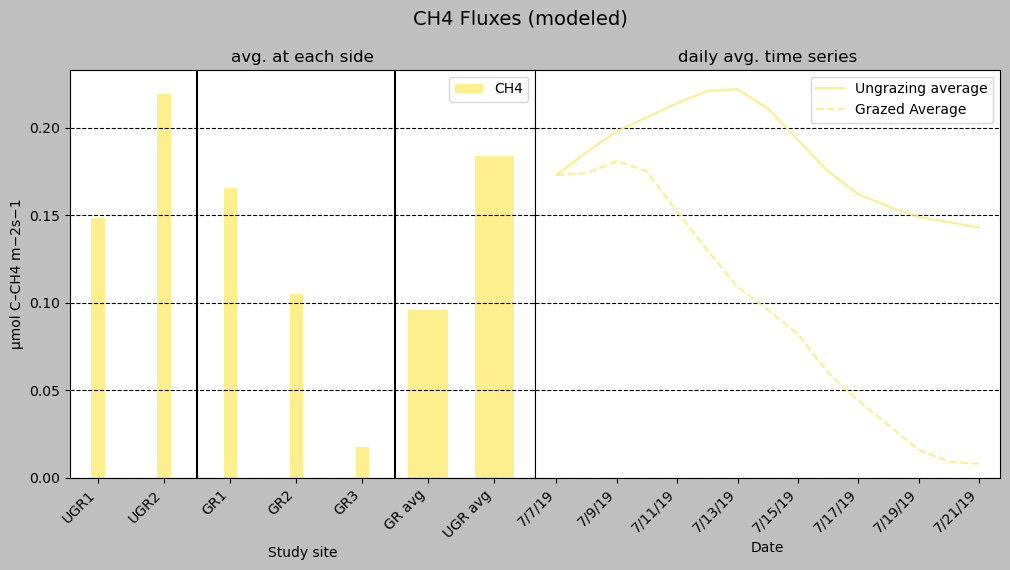

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Load data
data = pd.read_csv("daily_avg_EDMONT.csv")
GPP = [data['GPP.chamber2_0'].mean(), data['GPP.chamber2_2'].mean(), data['GPP.chamber1_1'].mean(),
       data['GPP.chamber1_2'].mean(), data['GPP.chamber1_3'].mean(), data['GPP.pp'].mean(), data['GPP.AS'].mean()]
CH4 = [data['CH4.chamber2_0'].mean(), data['CH4.chamber2_2'].mean(), data['CH4.chamber1_1'].mean(),
       data['CH4.chamber1_2'].mean(), data['CH4.chamber1_3'].mean(), data['CH4.pp'].mean(), data['CH4.AS'].mean()]

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# Plot bar chart on the left subplot
x = np.arange(len(GPP))
width = [0.2, 0.2, 0.2, 0.2, 0.2, 0.6, 0.6]
ax1.bar(x, CH4, color='#FDEB71', label='CH4', width=width, align='center', alpha=0.8)
ax1.set_xticks(x)
ax1.set_xticklabels(['UGR1', 'UGR2', 'GR1', 'GR2', 'GR3', 'GR avg', 'UGR avg'])
ax1.set_ylabel('µmol C–CH4 m−2s−1')
ax1.grid(axis='y', linestyle='--')
ax1.grid(axis='x', linestyle='none')
ax1.axvline(x=1.5, color='black')
ax1.axvline(x=4.5, color='black')
ax1.set_xlabel('Study site')
ax1.set_title("avg. at each side")


ax1.legend()

# Plot line chart on the right subplot
ax2.plot(data['Date'], data['CH4.AS'], label="Ungrazing average", color="#FDEB71", alpha=0.8)
ax2.plot(data['Date'], data['CH4.pp'], label="Grazed Average", color="#FDEB71", linestyle='--', alpha=0.8)
ax2.set_xlabel('Date')
ax2.grid(axis='y', linestyle='--')
ax2.grid(axis='x', linestyle='none')
ax2.set_title("daily avg. time series")
ax2.legend()

# Format x-axis as dates
ax2.xaxis.set_major_locator(plt.MaxNLocator(10))
fig.autofmt_xdate(rotation=45)

fig.subplots_adjust(wspace=0)
fig.suptitle("CH4 Fluxes (modeled)", fontsize=14)

plt.show()
